# Setup

In [1]:
%alias riak docker-compose -f /opt/compose/compose-riak/docker-compose.yml
%alias riak-admin docker exec -it compose-riak_coordinator_1 riak-admin

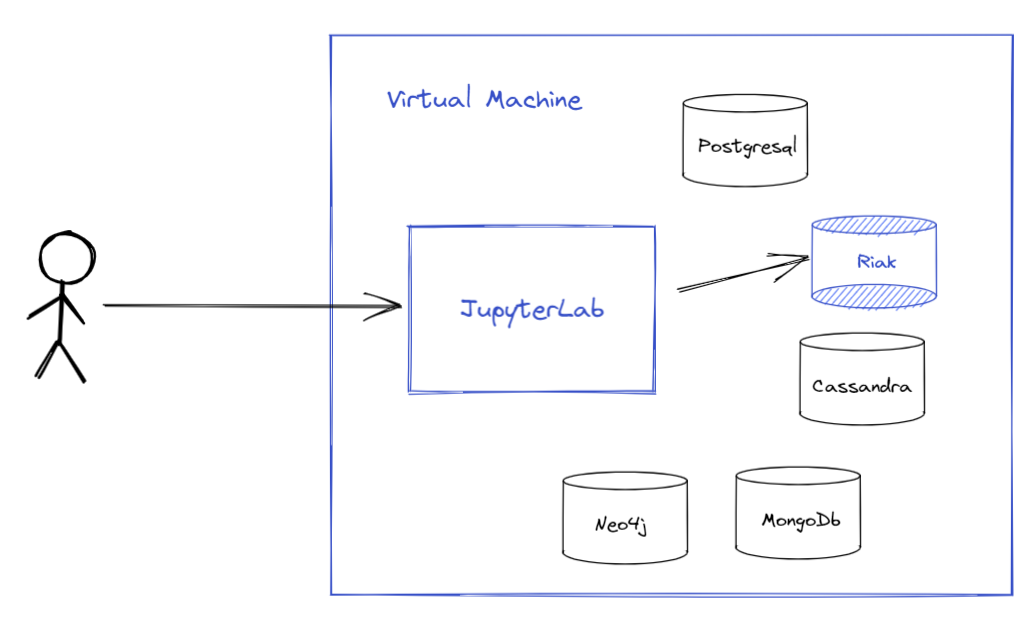

In [2]:
!docker ps

CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES


# Start Coordinator

In [3]:
riak up -d coordinator

Creating network "compose-riak_default" with the default driver
Creating compose-riak_coordinator_1 ... 
ting compose-riak_coordinator_1 ... done

In [4]:
!sleep 5

# Bucket Types

* Maps

In [5]:
%riak-admin bucket-type create maps '{"props":{"datatype":"map"}}'
%riak-admin bucket-type activate maps

maps created

can no longer be downgraded to a version of Riak prior to 2.0
maps has been activated

downgraded to a version of Riak prior to 2.0


* Sets

In [6]:
%riak-admin bucket-type create sets '{"props":{"datatype":"set"}}'
%riak-admin bucket-type activate sets

sets created
sets has been activated


* Counters

In [7]:
%riak-admin bucket-type create counters '{"props":{"datatype":"counter"}}'
%riak-admin bucket-type activate counters

counters created
counters has been activated


# Containers

In [8]:
riak ps

         Name                   Command           State           Ports         
--------------------------------------------------------------------------------
compose-                 /usr/lib/riak/riak-      Up      0.0.0.0:8087->8087/tcp
riak_coordinator_1       cluster.sh                       ,:::8087->8087/tcp, 0.
                                                          0.0.0:8098->8098/tcp,:
                                                          ::8098->8098/tcp      


# Logs

In [9]:
riak logs | tail

coordinator_1  | 2022-06-05 11:50:17.153 [info] <0.573.0>@riak_core:wait_for_service:504 Waiting for service riak_kv to start (0 seconds)
coordinator_1  | 2022-06-05 11:50:26.630 [info] <0.573.0>@riak_core:wait_for_service:498 Wait complete for service riak_kv (9 seconds)
coordinator_1  | 2022-06-05 11:50:26.653 [info] <0.7.0> Application yokozuna started on node 'riak@172.23.0.2'
coordinator_1  | 2022-06-05 11:50:26.663 [info] <0.7.0> Application cluster_info started on node 'riak@172.23.0.2'
coordinator_1  | 2022-06-05 11:50:26.671 [info] <0.360.0>@riak_core:wait_for_service:498 Wait complete for service riak_kv (9 seconds)
coordinator_1  | 2022-06-05 11:50:26.720 [info] <0.196.0>@riak_core_capability:process_capability_changes:555 New capability: {riak_control,member_info_version} = v1
coordinator_1  | 2022-06-05 11:50:26.722 [info] <0.7.0> Application riak_control started on node 'riak@172.23.0.2'
coordinator_1  | 2022-06-05 11:50:26.722 [info] <0.7.0> Application erlydtl started o

# Scale the Cluster (4 members)

This step scales the cluster (Not mandatory)

# Admin Riak

http://localhost:8098/admin/